In [62]:
import numpy as np
import pandas as pd
from keras.datasets import mnist

from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Loading data
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
test_data = train_X[:100]

In [84]:
# Hyper-paramters
# Size of grid to split the image into

x_grid_size = 4
y_grid_size = 4

threshold = 100

def biniarize_data(image):
    image[image >= threshold] = 100
    image[image < threshold] = 0

biniarize_data(test_data)

# Plotting an example
plt.imshow(test_data[0], cmap="gray")

In [162]:
def centroid(image):
    cen_sum = image.sum()
    if cen_sum == 0:
        return 0, 0
    
    x_sum = y_sum = 0
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            x_sum += x * image[y][x]
            y_sum += y * image[y][x]
    
    centroid_x = x_sum / cen_sum
    centroid_y = y_sum / cen_sum
    return centroid_x, centroid_y

def transform_feature(data):
    # Data is N x 28 x 28
    centroids = []
    for i in range(data.shape[0]):
    # Each sample
        sliced = slice_array(data[i])
        local_centroids = []
        for im in sliced:
            x,y = centroid(im)
            local_centroids.extend([x,y])
        centroids.append(local_centroids)
        
    return np.array(centroids)

def slice_array(data):
  # Todo make sure we can split the data correctly without raising an error
  ystep = data.shape[0] // y_grid_size
  xstep = data.shape[1] // x_grid_size
  temp = []
  for i in range(0, data.shape[0], ystep):
    for j in range(0, data.shape[1], xstep):
      arr = np.array(data[i:i+ystep, j:j+xstep])
      temp.append(arr)
  return np.array(temp)

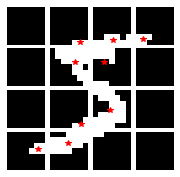

In [163]:
# Plotting a sample from our data after transforming the data
# A visualization of how the centroid is calculated for each batch of the image
img = slice_array(test_data[0])
plt.figure(figsize = (3,3))
for i in range(x_grid_size*y_grid_size):
    plt.subplot(y_grid_size,x_grid_size,i+1)
    x, y = centroid(img[i])
    if x != 0 and y != 0:
        plt.plot(x,y, 'r*')
    plt.imshow(img[i], cmap="gray")
    plt.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)

In [164]:
train_X_trans = transform_feature(train_X)
test_X_trans = transform_feature(test_X)

In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X_trans,train_Y)
predicted = model.predict(test_X_trans)

accuracy = accuracy_score(test_Y, predicted)

In [173]:
accuracy

0.9141